In [2]:
import xarray as xr
import dask
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import gsw
import pickle
import pandas as pd
import itertools
import seaborn as sns
sns.set('paper')

colors =itertools.cycle(plt.get_cmap('plasma')(np.linspace(0.15,0.85, 3)))
colorA=next(colors)
colorC=next(colors)
colorB=next(colors)
#import basemap
#fig sizes
Wf=(190/25.4)
Hf=(230/25.4)
Wf4=(95/25.4)
Hf4=(115/25.4)

color1='#00CD6C'#green
color2='#AF58BA'#purple
color3='#FFC61E' #yello
color4='#009ADE' #blue
color5='#F28522' #orange
color6='#A0B1BA' #gray
color7='#A6761D'#brown
color8='#FF1F5B' #red

In [4]:
cluster_data_path = '/home/amh001/space_fs7/DATA/NEP36-CanOE/From_Andrew/'
#cluster_data_path = './'
clusters_ds=[]
for ii in range(6):
    
    cluster_files = sorted(glob.glob(f'{cluster_data_path}/processed/daily/by_year/by_cluster/n_clusters_6/cluster_{ii}*.nc')) 
    #print(cluster_files    )
    cluster_ds =xr.open_mfdataset(cluster_files, chunks={'time':439}, engine='h5netcdf')
    clusters_ds.append(cluster_ds)

In [5]:
hist_kwargs = {
    'alpha':1,
    'density':False,
    'bins':20,
    'edgecolor':'None'
}

In [6]:
plot_clusters = [3, 0]
cluster_names = {3:'Shallows', 0:'Canyons'}
cluster_color = {3:colorA, 0:colorB}

In [7]:
# Plot timeseries of all the relevant variables

timeseries_vars = [
    'O2',
    'OmegaA',
    'T',
    # 'ALK_norm',
    # 'DIC_norm',
    # 'ALK',
    # 'DIC',
]


long_names = dict(
    O2=r"$[\mathrm{O}_2]$",
    OmegaA="$\Omega_A$",
    T="T",
    ALK_norm="nAlk",
    DIC_norm="nDIC",
     ALK="Alkalinity",
     DIC="DIC",
    S="",
        sigma_0=r"$\sigma_0$",
)

units = dict(
    O2="mmol m$^{-3}$",
    OmegaA="(non-dimensional)",
    T="$^\circ$C",
    S="",    
     ALK_norm="mmol m$^{-3}$",
     DIC_norm="mmol m$^{-3}$",
     ALK="mmol m$^{-3}$",
     DIC="mmol m$^{-3}$",
         sigma_0="kg m$^{-3}$"

)

let's try remaking the plot with the seasonal cylce removed

In [8]:
#clusters_ds[0]

In [9]:
# Split by upwelling season
downwelling_months = [10, 11, 12, 1, 2, 3]
upwelling_months   = [4, 5, 6, 7, 8, 9]
timeseries_vars = ['O2','OmegaA','T']
hist_kwargs = {
    'alpha':0.7,
    'density':True,
    'bins':200,
    'edgecolor':'None'
}

def filter_by_season_and_values(ds,month_range):       
    ds_out = ds.where(ds['time.month'].isin(month_range),drop=True)
    return ds_out

In [10]:
def PickleforPlots(y):
    x=y.time

    # make a dataframe with groups separated that are over a day apart
    data = []
    g = 0
    for i in range(len(x)):
        x0 = x[i].values
        #print('xo', x0)
        y0 = y[i].values
        if i < (len(x)-1):
            x1 = x[i+1]
            td = x1 - x0
            #print(td)
            elapsed_days = td/np.timedelta64(1, 'D')
            
            if elapsed_days < 2:
                
                data.append([x0,y0, g])
            else:
                data.append([x0,y0, g])
                g+=1
        else:
            data.append([x0,y0, g])
    
    return pd.DataFrame(data, columns=['x', 'y', 'group'])
def plot_fraction_extreme(ax, ds, thresholds, vars, plot_months, extreme_is_low, label,color,saveit):
    #saveit=1 save the seasons in a dataframe that will allow for plotting the lines separately.
    #saveit=2 save the frac_)extreme for computing correlations
    #saveit=0 do not save, plot
    frac_extreme = calc_extremes(ds, thresholds, vars)
    frac_extreme = frac_extreme.where(frac_extreme['time.month'].isin(plot_months))
    if saveit=='lines': 
        outfile='pickles/'+label +'.pickle'
        print('saving:', outfile) 
        df=PickleforPlots(frac_extreme)
        with open(outfile, 'wb') as handle:
                pickle.dump(df, handle)
    elif saveit=='corr':
        outfile='pickles/'+label +'_corr.pickle'
        print('saving:', outfile)
        with open(outfile, 'wb') as handle:
            pickle.dump(frac_extreme, handle)
    else:
         ax.scatter(frac_extreme.time, frac_extreme, label=label, s=2, color=color)
    


# Computing the thresholds and fraction of extremes

We prefer to plot the seasons as separate lines. There is an option in the plot function to save for later plotting. And to save for cirrelation analysis

Cluster label: 0
	O2 Upwelling: 58.9
	O2 Downwelling: 68.6
saving: pickles/Upwelling_0_O2_corr.pickle
saving: pickles/Downwelling_0_O2_corr.pickle
	OmegaA Upwelling: 0.6
	OmegaA Downwelling: 0.6
saving: pickles/Upwelling_0_OmegaA_corr.pickle
saving: pickles/Downwelling_0_OmegaA_corr.pickle
	T Upwelling: 6.4
	T Downwelling: 7.1
saving: pickles/Upwelling_0_T_corr.pickle
saving: pickles/Downwelling_0_T_corr.pickle
Cluster label: 3
	O2 Upwelling: 241.3
	O2 Downwelling: 260.1
saving: pickles/Upwelling_3_O2_corr.pickle
saving: pickles/Downwelling_3_O2_corr.pickle
	OmegaA Upwelling: 1.5
	OmegaA Downwelling: 1.3
saving: pickles/Upwelling_3_OmegaA_corr.pickle
saving: pickles/Downwelling_3_OmegaA_corr.pickle
	T Upwelling: 14.1
	T Downwelling: 10.7
saving: pickles/Upwelling_3_T_corr.pickle
saving: pickles/Downwelling_3_T_corr.pickle


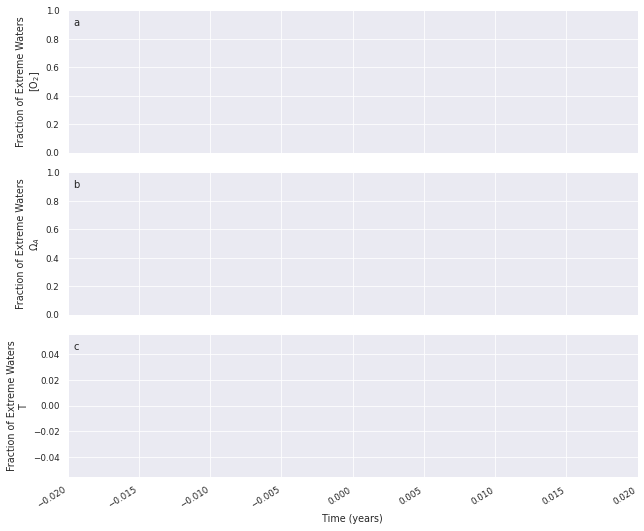

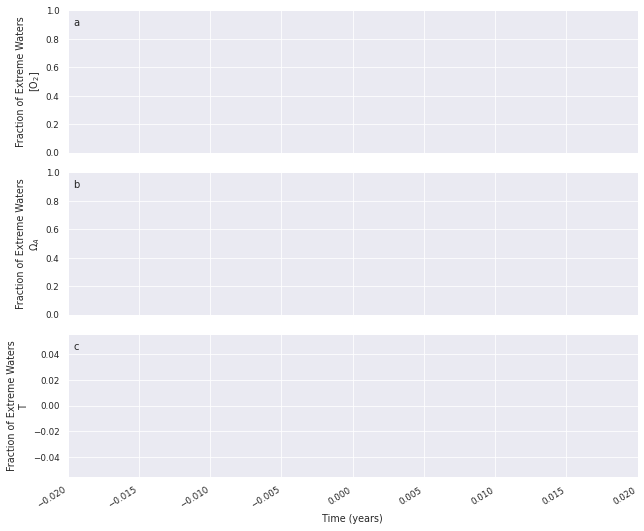

In [11]:
# Calculate extreme thresholds by upwelling/downwelling season and plot timeseries of percentage extremes
subpanel = ['a','b','c','d', 'e', 'f', 'g','h','i','j']

downwelling_months = [10, 11, 12, 1, 2, 3]
upwelling_months   = [4, 5, 6, 7, 8, 9]
timeseries_vars = ['O2','OmegaA','T']
hist_kwargs = {
    'alpha':0.5,
    'density':True,
    'bins':100
}

base_percentile = 0.1
percentiles = {
    'O2':base_percentile,
    'OmegaA':base_percentile,
    'T':1-base_percentile
}
at=0.01
bt=0.95
def calculate_threshold(ds, percentile, nbins=1000):
    data = ds.to_numpy().flatten()
    hist, edges = np.histogram(data, bins=nbins, density=True)
    cdf = integrate.cumtrapz(hist,edges[1:])
    return np.interp(percentile, cdf, edges[2:])    

def calc_extremes(ds, thresholds, vars):
    """Calculate which points in the domain exceed multiple thresholds"""
    is_extreme = xr.full_like(ds[vars[0]], True, dtype=bool)
    for var in vars:
        if var == 'T':
            is_extreme=is_extreme & (ds[var] >= thresholds[var])
        else:
            is_extreme=is_extreme & (ds[var] <= thresholds[var])
    npts = len(ds.stacked_y_x)
    frac_extreme = is_extreme.sum('stacked_y_x')/npts
    return frac_extreme


upwelling = {}
downwelling = {}

thresholds = {}

for cluster_label, cluster_ds in enumerate(clusters_ds):    
    if cluster_label in plot_clusters:
        thresholds[cluster_label] = {}
        thresholds[cluster_label]['upwelling'] = {}
        thresholds[cluster_label]['downwelling'] = {}
        ds_months = cluster_ds.groupby('time.month')
        
        # For every dataset separate data in upwelling and downwelling months
        upwelling_ds = filter_by_season_and_values(cluster_ds, upwelling_months)    
        downwelling_ds = filter_by_season_and_values(cluster_ds, downwelling_months)    
    
        upwelling[cluster_label] = upwelling_ds.copy()
        downwelling[cluster_label] = downwelling.copy()
        print(f'Cluster label: {cluster_label}')
                   
        fig, axs = plt.subplots(3, 1, sharex=True, figsize=(Hf,Wf))
        for idx, var in enumerate(timeseries_vars):         
            percentile = percentiles[var]
            upwelling_threshold = calculate_threshold(upwelling_ds[var],percentile)
            downwelling_threshold = calculate_threshold(downwelling_ds[var],percentile)
            thresholds[cluster_label]['upwelling'][var] = upwelling_threshold
            thresholds[cluster_label]['downwelling'][var] = downwelling_threshold
            print(f'\t{var} Upwelling: {upwelling_threshold:.1f}')
            print(f'\t{var} Downwelling: {downwelling_threshold:.1f}')
            plot_fraction_extreme(
                axs[idx],
                upwelling_ds, 
                thresholds[cluster_label]['upwelling'],
                [var],
                upwelling_months,
                percentile == base_percentile,
                f'Upwelling_{cluster_label}_{var}',
                color=color1, 
                saveit='corr'
            )
            plot_fraction_extreme(
                axs[idx],
                downwelling_ds, 
                thresholds[cluster_label]['downwelling'],
                [var],
                downwelling_months,
                percentile == base_percentile,
                f'Downwelling_{cluster_label}_{var}',
                color=color2,
                saveit='corr'
            )

            axs[idx].set_ylabel(f'Fraction of Extreme Waters\n{long_names[var]}')
            if idx==2:
                axs[idx].set_xlabel('Time (years)')
                for label in axs[idx].get_xticklabels():
                    label.set_rotation(32)
                    label.set_horizontalalignment("right")
            plt.axis('tight')
            X=axs[idx].get_xticks()
            plt.xlim([X[1], X[-2]])  
            axs[idx].text(at, bt, subpanel[idx], transform=axs[idx].transAxes,  va='top', fontweight='normal',zorder=1000)


        fig.tight_layout()


see the LinePlots notebook for the line plot instead of scatter